In [1]:
import Levenshtein
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from itertools import chain
from PLAB.utils import gini_coefficient

Read in count data.

In [2]:
file_sample_names = ['liquid', 'semisolid', 'small_plate','large_plate', 'bead']
names_dict = {'liquid': 'liquid', 'semisolid': 'semisolid', 'small_plate': 'high density spread', 'bead': 'bead spread', 'large_plate': 'low density spread'}
sample_names = [names_dict[name] for name in file_sample_names]
counts = []

for sample in file_sample_names:
    for replicate in range(1, 5):
        with open(f'../../data/20240318_counts/N80_counts_20240318/{sample}_{replicate}.pkl', 'rb') as f:
            clusters = pickle.load(f)
            for center in clusters:
                counts.append((names_dict[sample], replicate, center, clusters[center].total()))

df = pd.DataFrame(counts, columns=['sample', 'rep', 'sequence', 'count'])
df.head()

,sample,rep,sequence,count
0,liquid,1,CGATAAGGTGGACCATTATGTGAAGTGGAGGAAAGAGCTTTCAAAT...,120
1,liquid,1,CTGGGTTTGCCAGGTTCACGAAGTGCGGTAGTCCGTAGTGATTTAA...,105
2,liquid,1,AATCCTTATGAGTGTCGGGTAGGGGCCGGAAAAGATAATTCCTTCA...,103
3,liquid,1,TTAATAATAAGAAACATCGTAGTAGTATATCTGGCTAAGCCTGACA...,102
4,liquid,1,TGGTGTATGTTGGGTGCGCGTGTCCAGTAGATTAAAAAGAACCTAA...,100


Calculate various statistics for each sample and plot them.

In [3]:
# sample_stats = []
# for rep in range(1, 5):
#     for sample in sample_names:
#         sample_counts = df.loc[(df['rep'] == rep) & (df['sample'] == sample)]['count']
#         nobs, minmax, mean, var, skew, kurtosis = stats.describe(sample_counts)
#         reads = sample_counts.sum()
#         gini = gini_coefficient(np.array(sample_counts))
#         median = np.median(sample_counts)
#         stdev = np.std(sample_counts)
#         sample_stats.append((sample, rep, nobs, reads, minmax[1], mean, median, stdev, skew, kurtosis, gini))
# sample_stats_df = pd.DataFrame(sample_stats, columns=['sample', 'rep', 'unique seqs', 'reads', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini']).melt(id_vars=['sample', 'rep'])
# sample_stats_df.to_pickle('N80_sample_stats.pkl')
# sample_stats_df.head()

In [4]:
sample_stats_df = pd.read_pickle('N80_sample_stats.pkl')

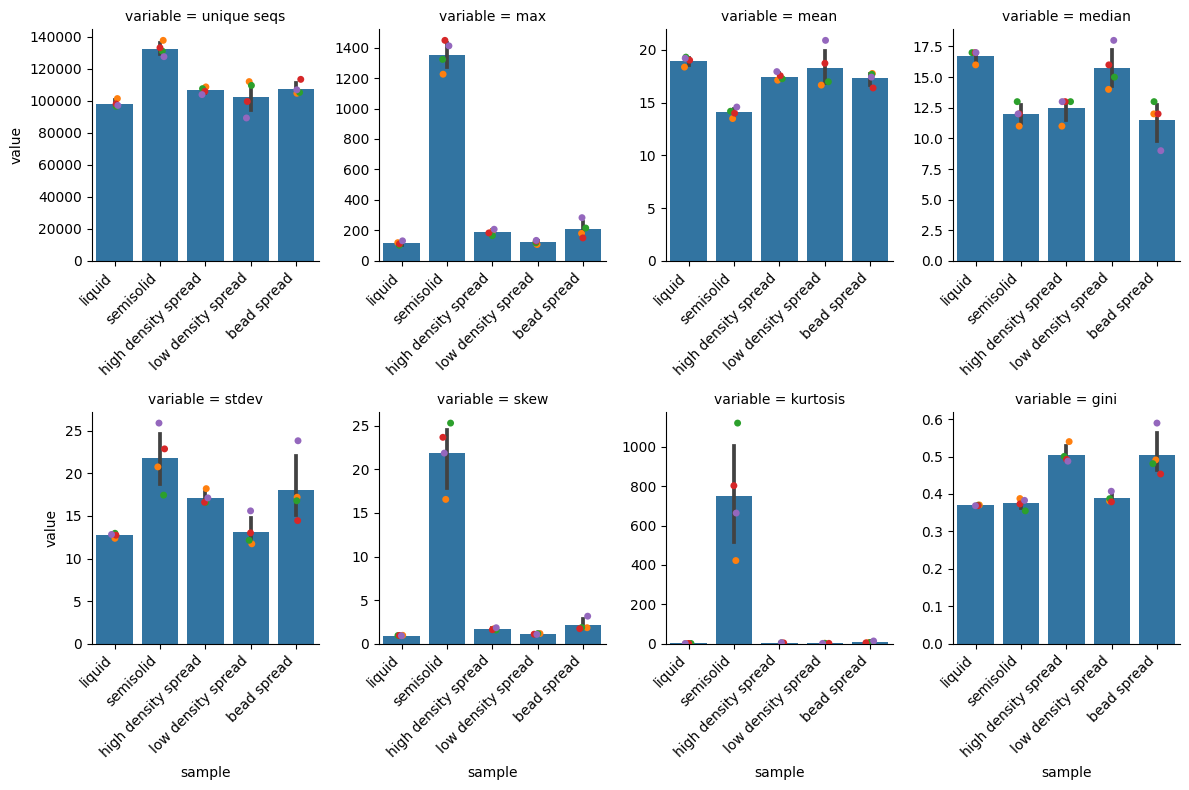

In [5]:
g = sns.FacetGrid(sample_stats_df, col='variable',
                  col_order=['unique seqs', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini'],
                  col_wrap=4, height=4, aspect=0.75, sharex=False, sharey=False)
g.map(sns.barplot, 'sample', 'value', order=sample_names)
g.map(sns.stripplot, 'sample', 'value', 'rep', order=sample_names, hue_order=[1, 2, 3, 4], palette=sns.color_palette()[1:5])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

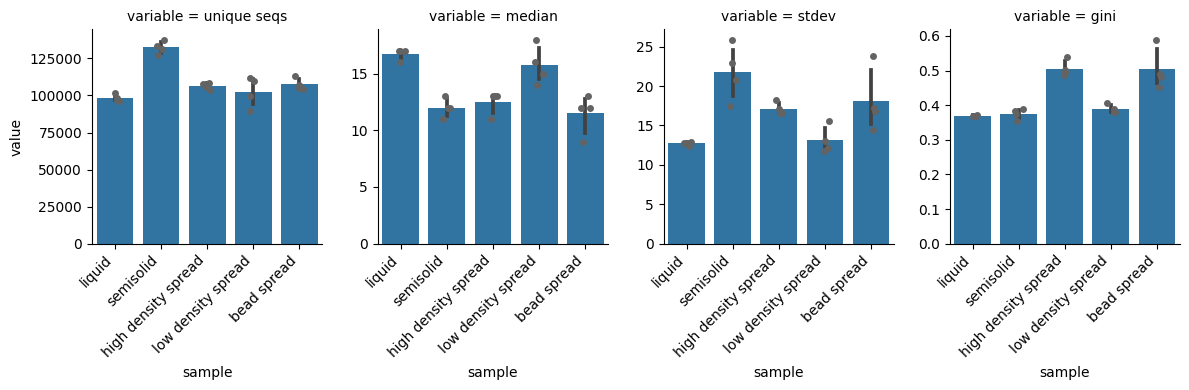

In [6]:
g = sns.FacetGrid(sample_stats_df, col='variable',
                  col_order=['unique seqs','median', 'stdev', 'gini'],
                  col_wrap=4, height=4, aspect=0.75, sharex=False, sharey=False)
g.map(sns.barplot, 'sample', 'value', order=sample_names)
g.map(sns.stripplot, 'sample', 'value', order=sample_names, color='#636363')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig('N80_sample_stats.svg', format='svg')
plt.show()

Plot the distribution of counts for each sample.

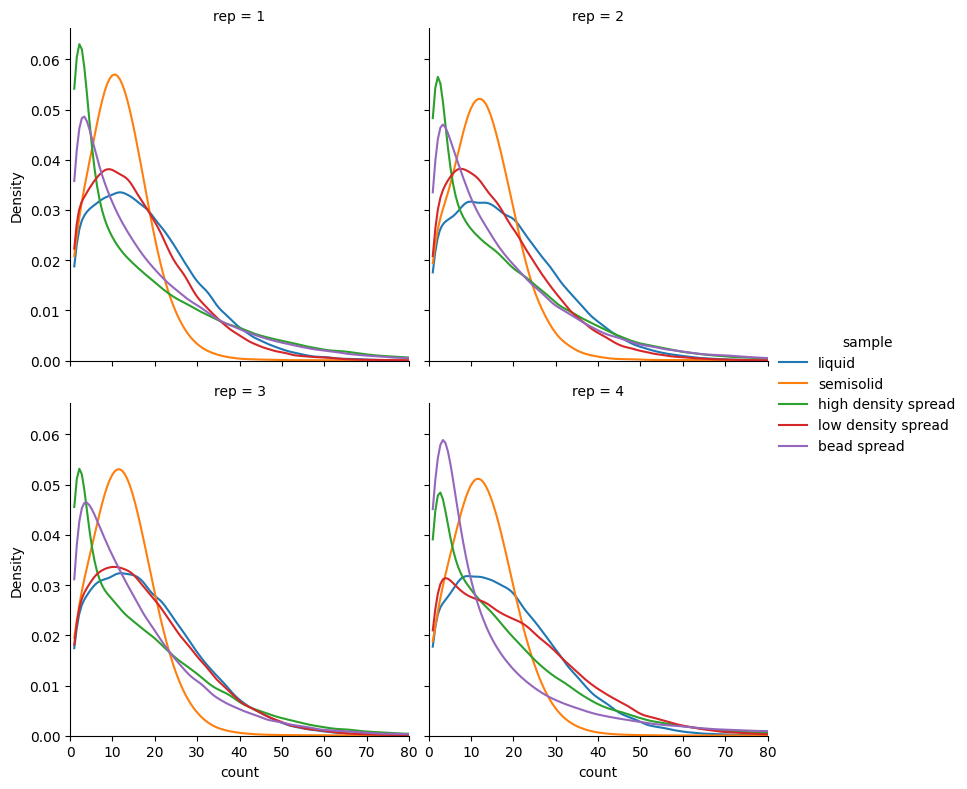

In [7]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.kdeplot, 'count', clip=[1,120])
plt.xlim([0,80])
g.add_legend()
plt.show()

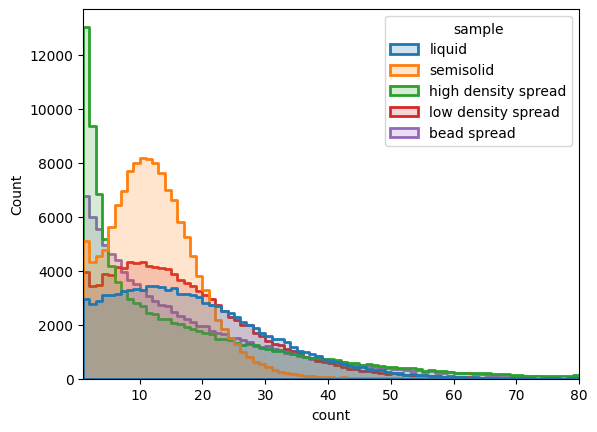

In [8]:
rep1_df = df.loc[df['rep'] == 1]
sns.histplot(rep1_df, x='count', hue='sample', bins=range(1, 81), element='step', alpha=0.2, linewidth=2)
plt.xlim([1,80])
g.add_legend()
plt.savefig('N80_rep1_hist.svg', format='svg')
plt.show()

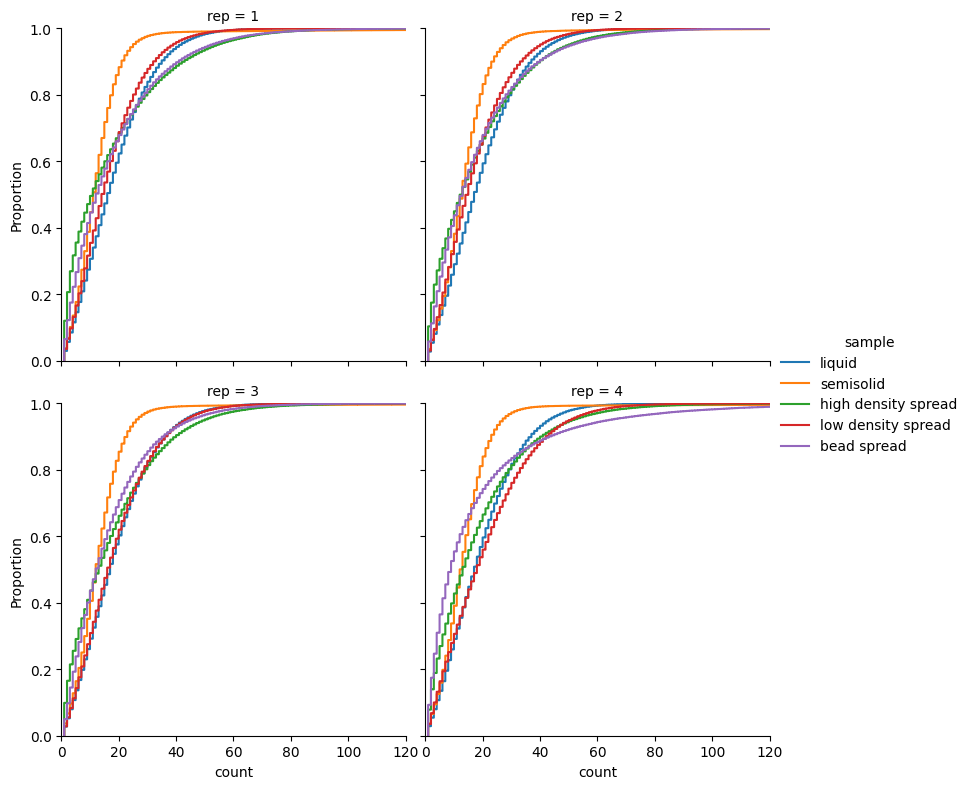

In [9]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.ecdfplot, 'count')
plt.xlim([0,120])
g.add_legend()
plt.show()

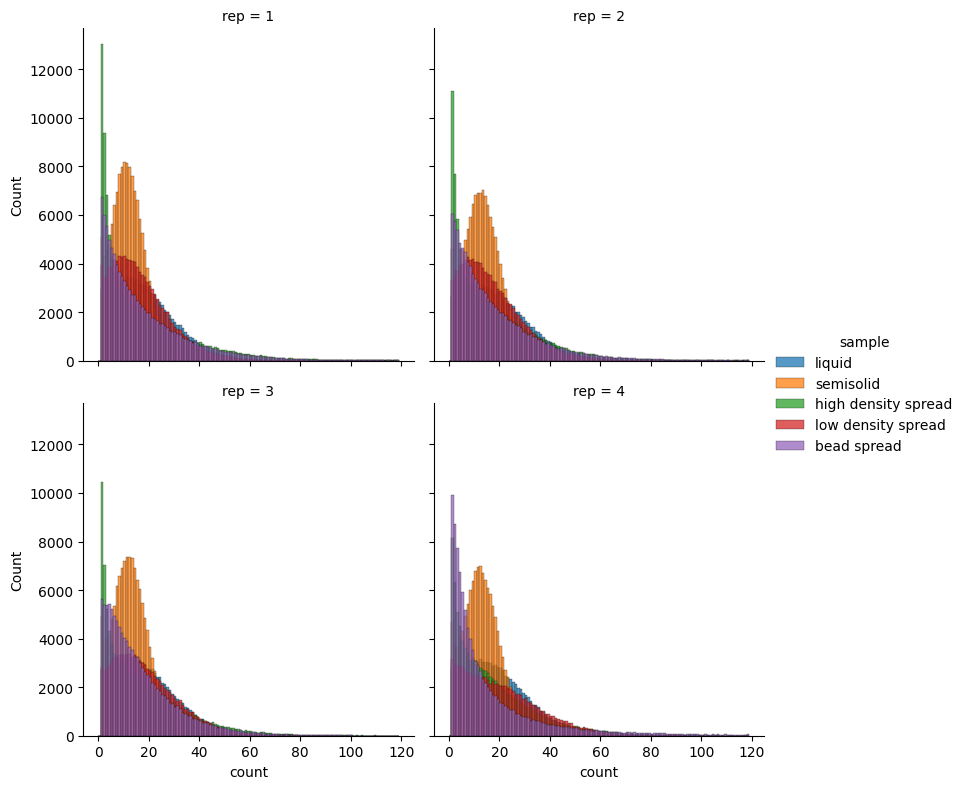

In [10]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.histplot, 'count', bins=range(120))
g.add_legend()
plt.show()

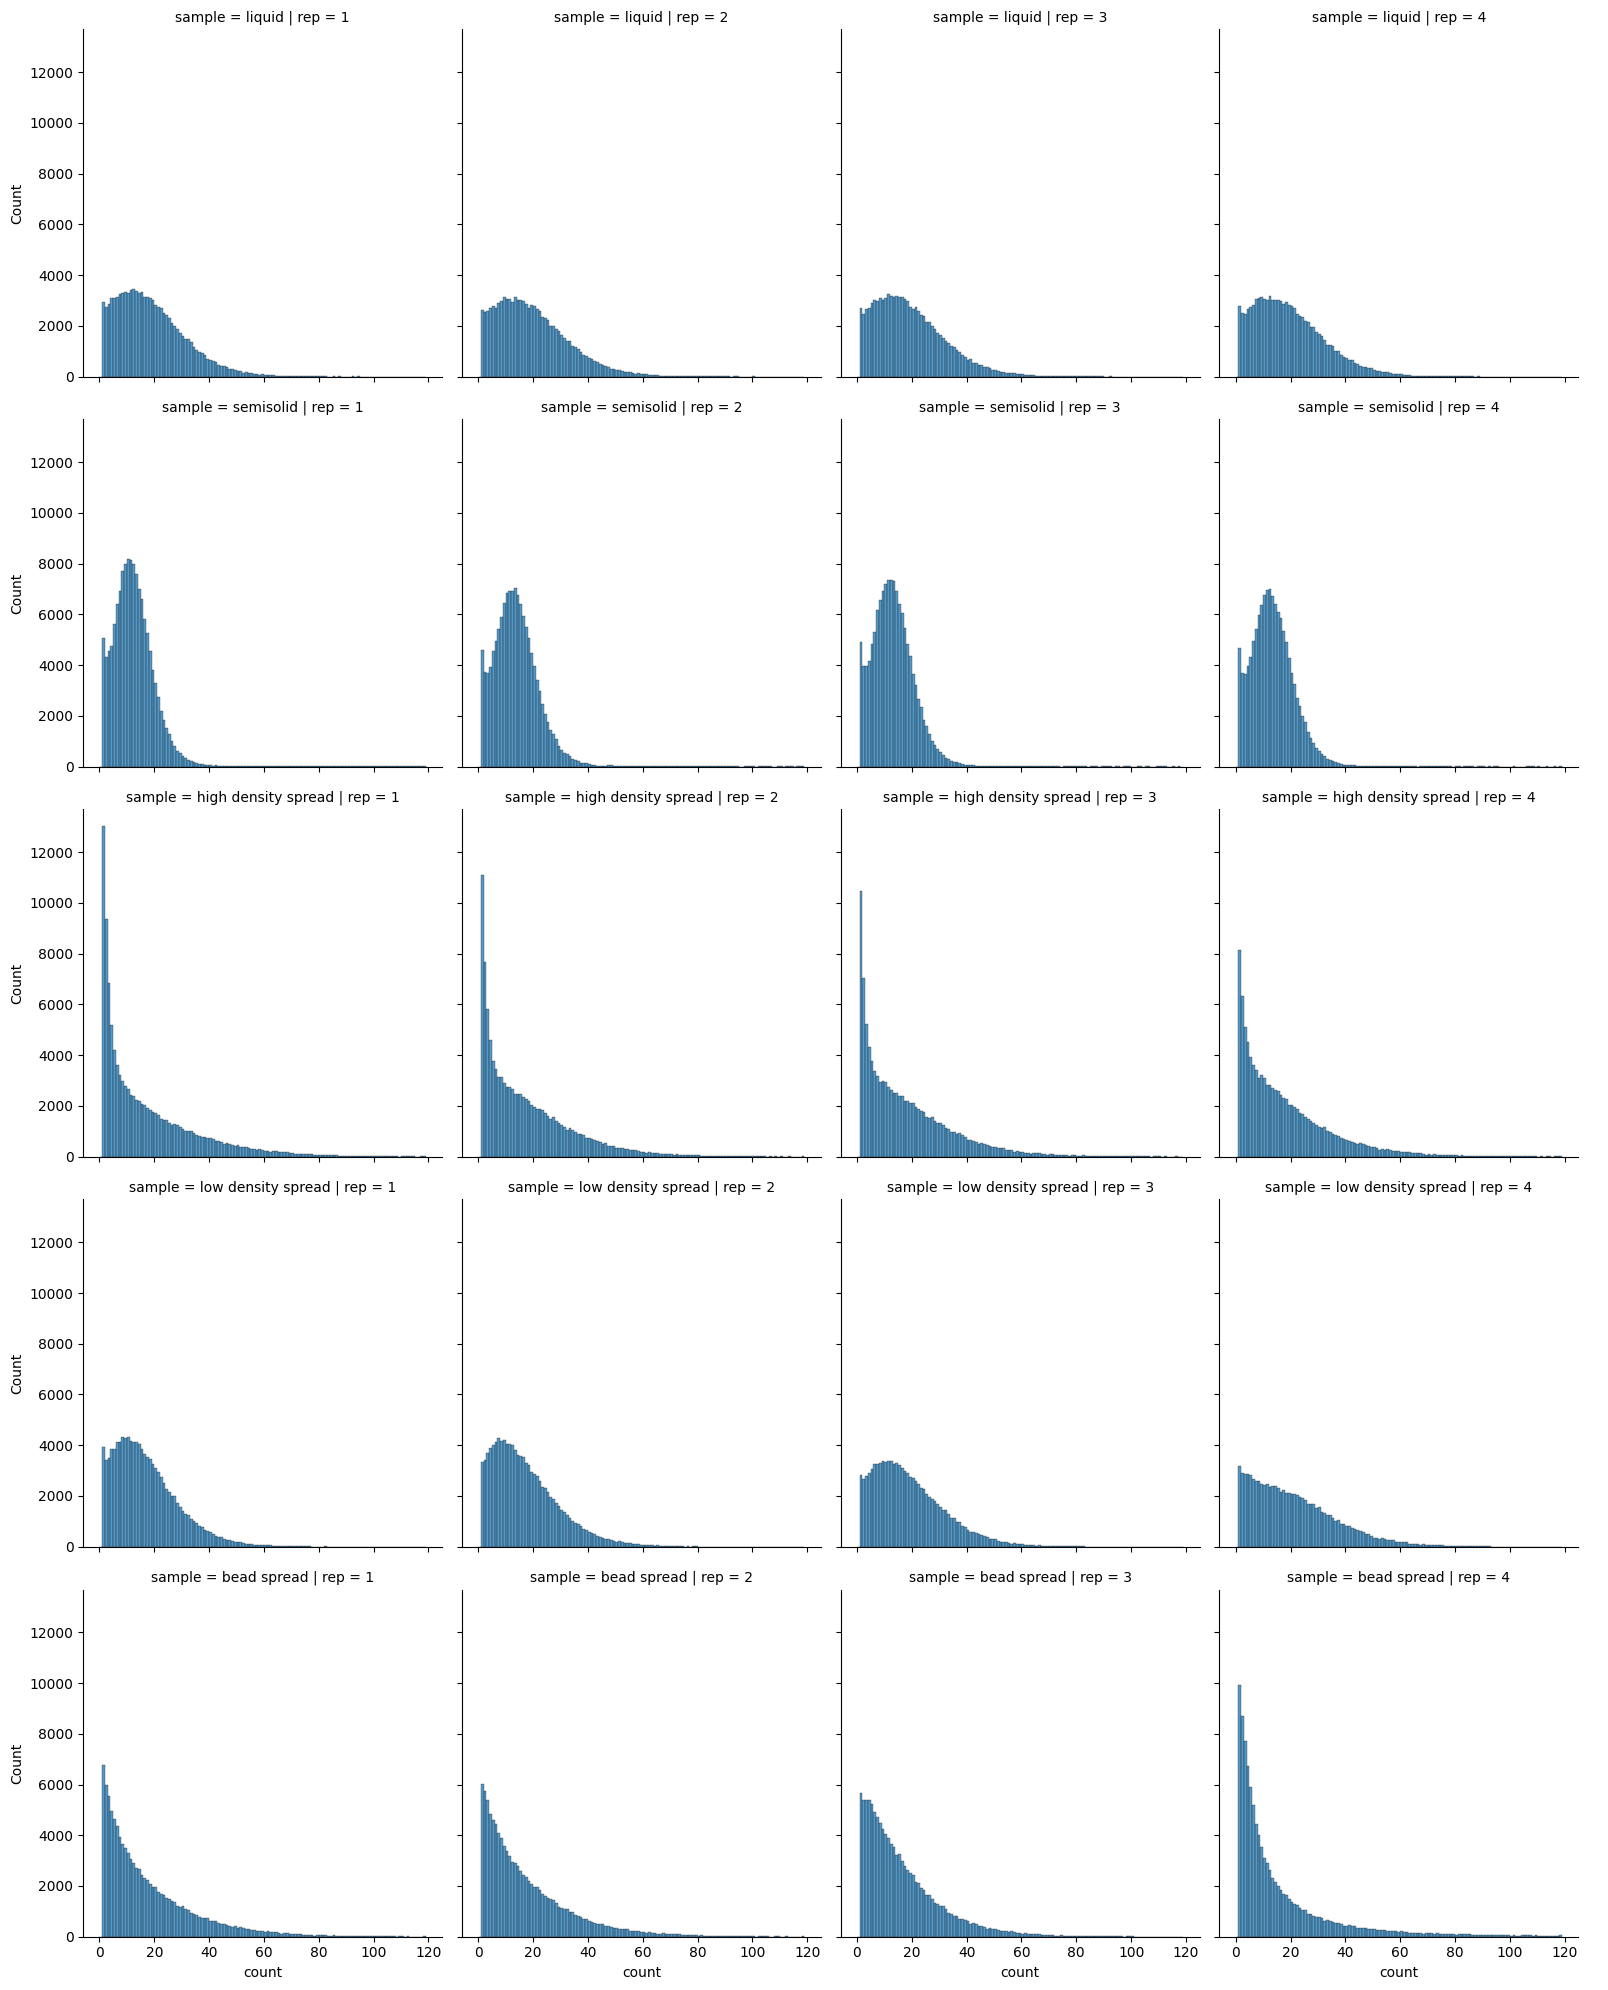

In [11]:
g = sns.FacetGrid(df, col='rep', row='sample', height=4)
g.map(sns.histplot, 'count', bins=range(120))
g.add_legend()
plt.show()

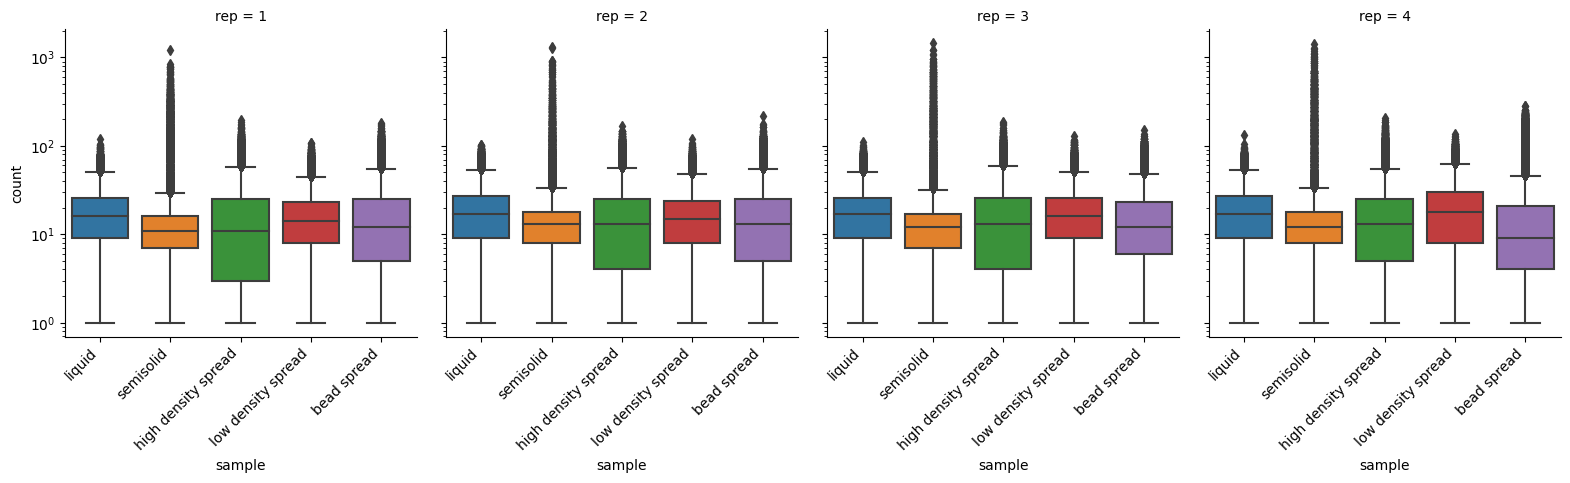

In [12]:
g = sns.catplot(data=df, x="sample", y="count", col='rep', col_wrap=4, height=4, kind='box')
g.set(yscale="log")
g.set_xticklabels(rotation=45, ha='right')
plt.show()

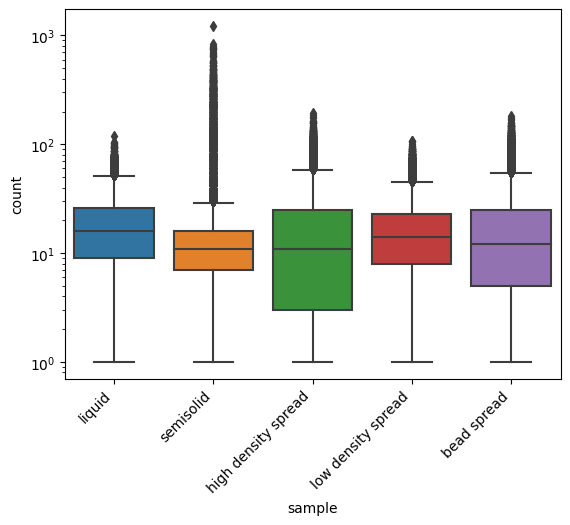

In [13]:
sns.boxplot(data=rep1_df, x='sample', y='count')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.savefig('N80_rep1_box.svg', format='svg')
plt.show()

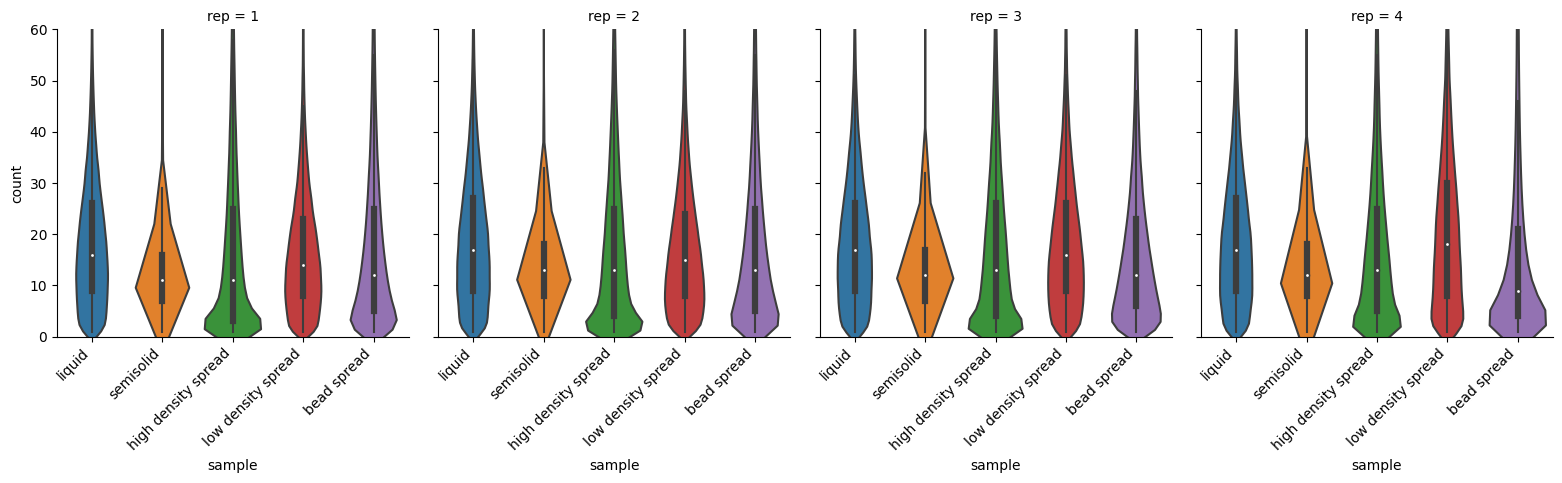

In [14]:
g = sns.catplot(data=df, x="sample", y="count", col='rep', col_wrap=4, height=4, kind='violin', clip=[1,120])
g.set_xticklabels(rotation=45, ha='right')
for ax in g.axes.flat:
    ax.set_ylim(0, 60)
plt.show()

In [15]:
df_filtered = df[df['sample'] == 'semisolid']
df_filtered_sorted = df_filtered.sort_values(by='count', ascending=False)
df_filtered_sorted.head(20)

,sample,rep,sequence,count
661868,semisolid,3,ACCATCACTATGCTCCTTGTTCAAATTAAGGCGTGTGTTGAAAACG...,1447
794996,semisolid,4,GGTGTCTAGTTGATGATCGTGATGTTAAACTGCTCATCCTGTGTCT...,1411
530830,semisolid,2,ATTGCCGGGCCACAGGTGTGAATTCCTCCTTAGAATACCTGGTTCC...,1322
794997,semisolid,4,TCCACGGGCATAGTCAAATAACGTTGACTGTTATGGTTACGTCTGC...,1275
530831,semisolid,2,GACGAGCTTCATAATAGCGTCTCTATCGTGGGAGCCGGACTTGGTT...,1268
794998,semisolid,4,ATTACAAGTTTCCTTAGACCCCTGATCAGCTTTAAGGGTATAAGAA...,1234
393096,semisolid,1,GAAAACTGTAGGTACGCCGCTCCCAGTGGCTGCTAGCTGAGAAGGC...,1225
661869,semisolid,3,TCTAGGAGCGCAGGTACTCTATCGCTTGCTCAAACTTGCAGAGACT...,1219
661870,semisolid,3,TAGTTCTTGAAGCGGCTTTCTTGAGAGATGTCTACTAGGCTCCATT...,1200
794999,semisolid,4,CAGCTTGGCAGATGTGTGCATGGGGTATATTGCTCCCACTTGCAGC...,1189


In [16]:
df_filtered = df[df['count'] < 100]
df_filtered.head()

,sample,rep,sequence,count
5,liquid,1,CAGAGGAGATGGTTTGACATTGAGGTTGTAATTTGTCTCATGCGCT...,98
6,liquid,1,GGATGTAAATTTACTCCAATTACTGTGGTTGTGTTTTTATCGCTAT...,97
7,liquid,1,ATGTTGGTATGTCTCTCGAAATCCCTTCGGCCTTTTGTTTTGAAAC...,96
8,liquid,1,CATCGATTTTCAGGTGATTGCGCCCAGCGCAGACATCTACCCGATC...,95
9,liquid,1,AGTGAGTATTATGCATTGAAGAAATCACTGTATTCACTGGTGGGCT...,94


In [17]:
# sample_stats = []
# for rep in range(1, 5):
#     for sample in sample_names:
#         sample_counts = df_filtered.loc[(df_filtered['rep'] == rep) & (df_filtered['sample'] == sample)]['count']
#         nobs, minmax, mean, var, skew, kurtosis = stats.describe(sample_counts)
#         reads = sample_counts.sum()
#         gini = gini_coefficient(np.array(sample_counts))
#         median = np.median(sample_counts)
#         stdev = np.std(sample_counts)
#         sample_stats.append((sample, rep, nobs, reads, minmax[1], mean, median, stdev, skew, kurtosis, gini))
# sample_stats_df_filtered = pd.DataFrame(sample_stats, columns=['sample', 'rep', 'unique seqs', 'reads', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini']).melt(id_vars=['sample', 'rep'])
# sample_stats_df_filtered.to_pickle('N80_filtered_sample_stats.pkl')
# sample_stats_df_filtered.head()

In [18]:
sample_stats_df_filtered = pd.read_pickle('N80_filtered_sample_stats.pkl')

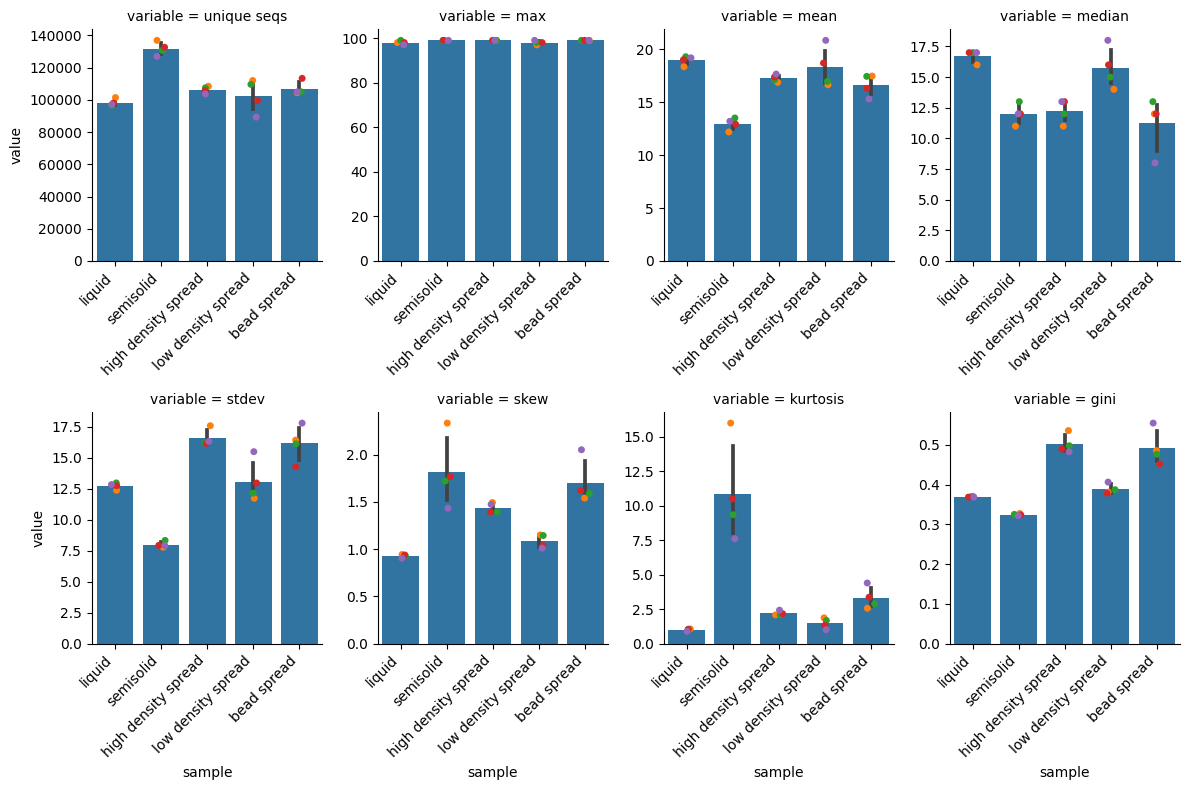

In [19]:
g = sns.FacetGrid(sample_stats_df_filtered, col='variable',
                  col_order=['unique seqs', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini'],
                  col_wrap=4, height=4, aspect=0.75, sharex=False, sharey=False)
g.map(sns.barplot, 'sample', 'value', order=sample_names)
g.map(sns.stripplot, 'sample', 'value', 'rep', order=sample_names, hue_order=[1, 2, 3, 4], palette=sns.color_palette()[1:5])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

The semisolid samples all have a lot more unique sequences than the rest of the samples, which is unexpected. I want to check that the sequences have been clustered properly, as maybe the heating and longer centrifugation process of extracting the cells from the semisolid agarose, or just growth in anaerobic conditions, somehow led to more mutations in the semisolid samples. I'll take the sequences with lower counts and see if they are close to any of the other sequences in the sample.

In [20]:
def closest_sequence(ref, seqs):
    min_dist = 100
    closest_seq = None
    found = False
    for seq in seqs:
        if seq == ref and not found:
            found = True
        elif seq == ref and found:
            raise ValueError('Duplicate sequence in list')
        else:
          dist = Levenshtein.distance(ref, seq)
          if dist < min_dist:
              min_dist = dist
              closest_seq = seq
    return (min_dist, closest_seq)

subset_df = df[(df['sample'] == 'semisolid') & (df['rep'] == 1)]
seq_counts = list(zip(subset_df['sequence'], subset_df['count']))
seq_counts_sorted = sorted(seq_counts, key=lambda x: x[1], reverse=True)

In [21]:
res = [closest_sequence(seq[0], subset_df['sequence']) for seq in seq_counts_sorted[:5000]]

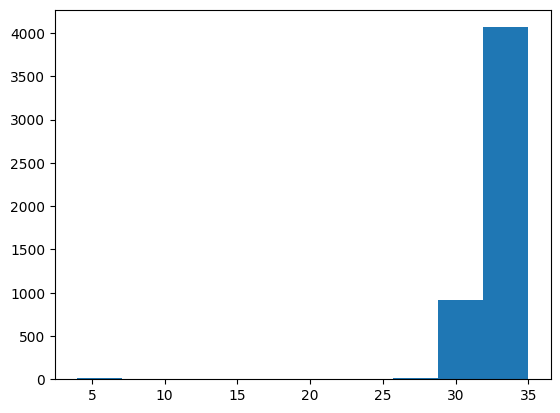

In [22]:
plt.hist([r[0] for r in res])
plt.show()

In [23]:
res_sorted = sorted(res, key=lambda x: x[0])
res_sorted[:20]

[(4,
  'CCTTATCTACCACTGCCGTTCCGCACTTTCGCGGGCTACAATCACCATTATGAAACCGAACAGGCACCGTCTGGACGGGT'),
 (4,
  'TAATAGAATGGTAATATCAGGACTTCTGTACGGCGTTCTAGAGGGCGAAGTGTACTAAGGTGTGGGCAGAACAGACCATT'),
 (4,
  'AAAAATCTAGTCCACTTCTCCGTTGCTATAGGCACAAGTGAGTTCATGGCTTGAGGATCTCGGAAAATGCTTTGGCGGGG'),
 (4,
  'GGTAGGGAGTGAAATAGATGGCTGGCTTATTGTTGGAGAAAGAGCTTAACATAGAAGGGTCATTCGCGAAGGCCGTAAAA'),
 (4,
  'CTCTCGGTGCTGGGGAATTCACAACGTTTTAATAGGCGCGGGCGTCCGTGGGCGTGTAGCTAGAGGCGTACGGGGGCGTG'),
 (4,
  'ACATAAAATGTTTATTAGAAGTGGGAGTGGGATATCACCTAGTCTTCCACGCTGGCTTCGGTGAAGGTCATGATTATATT'),
 (4,
  'TGATTCCTTCATCGTGAAGACAAACGCTTCACACGACAGGGGGGACGTTGAGCTGAAGGGGTAGATCGCAGAAATAGACA'),
 (5,
  'AGGTCCCTTATTTGGGGGCTGAAGTCTCAACCATCTCGTTGGGAAATGCGATTGGTAGTTCGGTTCTTTTTAATGCTCCG'),
 (5,
  'ACCACTCGAACCCGATTTGGAGAGTTAGATGCAATTCGCTGATAACAGGCAAGGTCGGGAGTTGTCCAGCGTACATTTAG'),
 (27,
  'CGCGGGGTCATTCGAGTAGGTCTGGAAGATGGGAGAAGATACGGGCACGCCGAAGATGGTGGGCGCGGCGCGATGAAACG'),
 (28,
  'AGTTTTTGGTGATGTAAGTAGGATGTTTCGGGGGCGGGCGTAGTAACAGGTAAACCAGTTCAATATTGCA